In [1]:
import tensorflow as tf
from tensorflow import keras

2024-03-23 10:13:41.745231: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-23 10:13:41.920113: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-23 10:13:41.920146: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-23 10:13:41.965131: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-23 10:13:42.943501: W tensorflow/stream_executor/platform/de

In [2]:
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
import pandas as pd
import os

df=pd.read_csv(os.path.join(os.getcwd(), "..", "data",'eurousd.csv'))
df.head()

date      time     open     high      low    close  volume
0  21/10/2002  01:05:00  0.97320  0.97325  0.97280  0.97285       0
1  21/10/2002  01:10:00  0.97300  0.97320  0.97300  0.97320       0
2  21/10/2002  01:15:00  0.97320  0.97320  0.97295  0.97310       0
3  21/10/2002  01:20:00  0.97315  0.97340  0.97270  0.97270       0
4  21/10/2002  01:25:00  0.97280  0.97295  0.97260  0.97260       0

In [4]:
df['date']=pd.to_datetime(df['date'])
df=df[df['date'].dt.year>2022]
df.head()

/tmp/ipykernel_341437/2224180313.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date']=pd.to_datetime(df['date'])


date      time     open     high      low    close  volume
1379671 2021-03-01  15:00:00  1.22413  1.22413  1.22385  1.22385      26
1379672 2021-03-01  15:05:00  1.22385  1.22387  1.22382  1.22387      32
1379673 2021-03-01  15:10:00  1.22388  1.22407  1.22388  1.22407      23
1379674 2021-03-01  15:15:00  1.22408  1.22416  1.22383  1.22383      49
1379675 2021-03-01  15:20:00  1.22384  1.22388  1.22382  1.22388      27

In [5]:
df['PrevClose'] = df['close'].shift(1)
df.head()

date      time     open     high      low    close  volume  \
1379671 2021-03-01  15:00:00  1.22413  1.22413  1.22385  1.22385      26   
1379672 2021-03-01  15:05:00  1.22385  1.22387  1.22382  1.22387      32   
1379673 2021-03-01  15:10:00  1.22388  1.22407  1.22388  1.22407      23   
1379674 2021-03-01  15:15:00  1.22408  1.22416  1.22383  1.22383      49   
1379675 2021-03-01  15:20:00  1.22384  1.22388  1.22382  1.22388      27   

         PrevClose  
1379671        NaN  
1379672    1.22385  
1379673    1.22387  
1379674    1.22407  
1379675    1.22383

In [6]:
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']
df['mom']=df['close'].rolling(3).mean()
df['dir']=np.where(df['Return'] < 0, 0, 1)
unique1, counts1 =np.unique(df['dir'], return_counts=True)
print(unique1, counts1)

[0 1] [117327 123752]


In [7]:
input_data = df[['close', 'mom']][2:]
targets = df['Return'].values

In [8]:
T = 10

In [9]:
Ntrain=int(len(input_data)*0.7)
print(len(input_data))
print(Ntrain)
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T - 1])
input_data = scaler.transform(input_data)

241077
168753


In [10]:
T = 10
D = input_data.shape[1]
N = len(input_data)
print(D)

2


In [11]:
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)
print(Ntrain)
for t in range(10,Ntrain):
  print(t-T,t)
  X_train[t, :, :] = input_data[t-T:t]
  Y_train[t] = (targets[t]>0)
X_train

168753
0 10
1 11
2 12
3 13
4 14
5 15
6 16
7 17
8 18
9 19
10 20
11 21
12 22
13 23
14 24
15 25
16 26
17 27
18 28
19 29
20 30
21 31
22 32
23 33
24 34
25 35
26 36
27 37
28 38
29 39
30 40
31 41
32 42
33 43
34 44
35 45
36 46
37 47
38 48
39 49
40 50
41 51
42 52
43 53
44 54
45 55
46 56
47 57
48 58
49 59
50 60
51 61
52 62
53 63
54 64
55 65
56 66
57 67
58 68
59 69
60 70
61 71
62 72
63 73
64 74
65 75
66 76
67 77
68 78
69 79
70 80
71 81
72 82
73 83
74 84
75 85
76 86
77 87
78 88
79 89
80 90
81 91
82 92
83 93
84 94
85 95
86 96
87 97
88 98
89 99
90 100
91 101
92 102
93 103
94 104
95 105
96 106
97 107
98 108
99 109
100 110
101 111
102 112
103 113
104 114
105 115
106 116
107 117
108 118
109 119
110 120
111 121
112 122
113 123
114 124
115 125
116 126
117 127
118 128
119 129
120 130
121 131
122 132
123 133
124 134
125 135
126 136
127 137
128 138
129 139
130 140
131 141
132 142
133 143
134 144
135 145
136 146
137 147
138 148
139 149
140 150
141 151
142 152
143 153
144 154
145 155
146 156
147 157
148 158
1

13863 13873
13864 13874
13865 13875
13866 13876
13867 13877
13868 13878
13869 13879
13870 13880
13871 13881
13872 13882
13873 13883
13874 13884
13875 13885
13876 13886
13877 13887
13878 13888
13879 13889
13880 13890
13881 13891
13882 13892
13883 13893
13884 13894
13885 13895
13886 13896
13887 13897
13888 13898
13889 13899
13890 13900
13891 13901
13892 13902
13893 13903
13894 13904
13895 13905
13896 13906
13897 13907
13898 13908
13899 13909
13900 13910
13901 13911
13902 13912
13903 13913
13904 13914
13905 13915
13906 13916
13907 13917
13908 13918
13909 13919
13910 13920
13911 13921
13912 13922
13913 13923
13914 13924
13915 13925
13916 13926
13917 13927
13918 13928
13919 13929
13920 13930
13921 13931
13922 13932
13923 13933
13924 13934
13925 13935
13926 13936
13927 13937
13928 13938
13929 13939
13930 13940
13931 13941
13932 13942
13933 13943
13934 13944
13935 13945
13936 13946
13937 13947
13938 13948
13939 13949
13940 13950
13941 13951
13942 13952
13943 13953
13944 13954
13945 13955
1394

array([[[ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       ...,

       [[-0.40036784, -0.39924611],
        [-0.3998243 , -0.40024259],
        [-0.39968842, -0.39997082],
        ...,
        [-0.39330186, -0.39598489],
        [-0.39411717, -0.39539606],
        [-0.39425305, -0.39390134]],

       [[-0.3998243 , -0.40024259],
        [-0.39968842, -0.39

In [12]:
Nval=int((N-Ntrain)*0.4)
X_val=np.zeros((Nval,T,D))
Y_val=np.zeros(Nval)

for w in range(Nval):
  t=w+Ntrain
  X_val[w, :, :]=input_data[t-T:t]
  Y_val[w]=(targets[t]>0)
  print(w,t-T,t)
print(N-Ntrain+Nval)
print(N)
print(N - Ntrain)


0 168743 168753
1 168744 168754
2 168745 168755
3 168746 168756
4 168747 168757
5 168748 168758
6 168749 168759
7 168750 168760
8 168751 168761
9 168752 168762
10 168753 168763
11 168754 168764
12 168755 168765
13 168756 168766
14 168757 168767
15 168758 168768
16 168759 168769
17 168760 168770
18 168761 168771
19 168762 168772
20 168763 168773
21 168764 168774
22 168765 168775
23 168766 168776
24 168767 168777
25 168768 168778
26 168769 168779
27 168770 168780
28 168771 168781
29 168772 168782
30 168773 168783
31 168774 168784
32 168775 168785
33 168776 168786
34 168777 168787
35 168778 168788
36 168779 168789
37 168780 168790
38 168781 168791
39 168782 168792
40 168783 168793
41 168784 168794
42 168785 168795
43 168786 168796
44 168787 168797
45 168788 168798
46 168789 168799
47 168790 168800
48 168791 168801
49 168792 168802
50 168793 168803
51 168794 168804
52 168795 168805
53 168796 168806
54 168797 168807
55 168798 168808
56 168799 168809
57 168800 168810
58 168801 168811
59 1688

2798 171541 171551
2799 171542 171552
2800 171543 171553
2801 171544 171554
2802 171545 171555
2803 171546 171556
2804 171547 171557
2805 171548 171558
2806 171549 171559
2807 171550 171560
2808 171551 171561
2809 171552 171562
2810 171553 171563
2811 171554 171564
2812 171555 171565
2813 171556 171566
2814 171557 171567
2815 171558 171568
2816 171559 171569
2817 171560 171570
2818 171561 171571
2819 171562 171572
2820 171563 171573
2821 171564 171574
2822 171565 171575
2823 171566 171576
2824 171567 171577
2825 171568 171578
2826 171569 171579
2827 171570 171580
2828 171571 171581
2829 171572 171582
2830 171573 171583
2831 171574 171584
2832 171575 171585
2833 171576 171586
2834 171577 171587
2835 171578 171588
2836 171579 171589
2837 171580 171590
2838 171581 171591
2839 171582 171592
2840 171583 171593
2841 171584 171594
2842 171585 171595
2843 171586 171596
2844 171587 171597
2845 171588 171598
2846 171589 171599
2847 171590 171600
2848 171591 171601
2849 171592 171602
2850 171593 

In [13]:
X_test = np.zeros((N - Ntrain-Nval, T, D))
Y_test = np.zeros(N - Ntrain-Nval)
for u in range(N - Ntrain- Nval):
  t = u + Ntrain+Nval
  print(t-T)
  print(u,t-T,t)
  X_test[u, :, :] = input_data[t-T:t]
  Y_test[u] = (targets[t]>0 )

197672
0 197672 197682
197673
1 197673 197683
197674
2 197674 197684
197675
3 197675 197685
197676
4 197676 197686
197677
5 197677 197687
197678
6 197678 197688
197679
7 197679 197689
197680
8 197680 197690
197681
9 197681 197691
197682
10 197682 197692
197683
11 197683 197693
197684
12 197684 197694
197685
13 197685 197695
197686
14 197686 197696
197687
15 197687 197697
197688
16 197688 197698
197689
17 197689 197699
197690
18 197690 197700
197691
19 197691 197701
197692
20 197692 197702
197693
21 197693 197703
197694
22 197694 197704
197695
23 197695 197705
197696
24 197696 197706
197697
25 197697 197707
197698
26 197698 197708
197699
27 197699 197709
197700
28 197700 197710
197701
29 197701 197711
197702
30 197702 197712
197703
31 197703 197713
197704
32 197704 197714
197705
33 197705 197715
197706
34 197706 197716
197707
35 197707 197717
197708
36 197708 197718
197709
37 197709 197719
197710
38 197710 197720
197711
39 197711 197721
197712
40 197712 197722
197713
41 197713 197723
19

198040
368 198040 198050
198041
369 198041 198051
198042
370 198042 198052
198043
371 198043 198053
198044
372 198044 198054
198045
373 198045 198055
198046
374 198046 198056
198047
375 198047 198057
198048
376 198048 198058
198049
377 198049 198059
198050
378 198050 198060
198051
379 198051 198061
198052
380 198052 198062
198053
381 198053 198063
198054
382 198054 198064
198055
383 198055 198065
198056
384 198056 198066
198057
385 198057 198067
198058
386 198058 198068
198059
387 198059 198069
198060
388 198060 198070
198061
389 198061 198071
198062
390 198062 198072
198063
391 198063 198073
198064
392 198064 198074
198065
393 198065 198075
198066
394 198066 198076
198067
395 198067 198077
198068
396 198068 198078
198069
397 198069 198079
198070
398 198070 198080
198071
399 198071 198081
198072
400 198072 198082
198073
401 198073 198083
198074
402 198074 198084
198075
403 198075 198085
198076
404 198076 198086
198077
405 198077 198087
198078
406 198078 198088
198079
407 198079 198089


In [14]:
i = Input(shape=(T, D))
x = LSTM(30, dropout=0.2)(i)
x=keras.layers.Dropout(0.5)(x)
#x= Dense(10, activation='relu')(x)
#x=keras.layers.Dropout(0.3)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.001),
  metrics=['accuracy']
)

2024-03-23 10:13:55.539747: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-23 10:13:55.539889: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-23 10:13:55.539961: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2024-03-23 10:13:55.540029: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2024-03-23 10:13:55.540096: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [15]:
#es = EarlyStopping(patience=20, restore_best_weights=True)
#callbacks=[es],
history = model.fit(X_train, Y_train,
          validation_data=(X_val, Y_val),
          batch_size=32,
          epochs=40,

          verbose=1)

Epoch 1/40
5274/5274 [==============================] - 66s 12ms/step - loss: 0.6937 - accuracy: 0.5059 - val_loss: 0.6930 - val_accuracy: 0.5084
Epoch 2/40
5274/5274 [==============================] - 64s 12ms/step - loss: 0.6930 - accuracy: 0.5106 - val_loss: 0.6931 - val_accuracy: 0.5084
Epoch 3/40
5274/5274 [==============================] - 69s 13ms/step - loss: 0.6930 - accuracy: 0.5111 - val_loss: 0.6930 - val_accuracy: 0.5084
Epoch 4/40
5274/5274 [==============================] - 64s 12ms/step - loss: 0.6929 - accuracy: 0.5113 - val_loss: 0.6930 - val_accuracy: 0.5084
Epoch 5/40
5274/5274 [==============================] - 63s 12ms/step - loss: 0.6929 - accuracy: 0.5113 - val_loss: 0.6930 - val_accuracy: 0.5084
Epoch 6/40
5274/5274 [==============================] - 63s 12ms/step - loss: 0.6929 - accuracy: 0.5112 - val_loss: 0.6930 - val_accuracy: 0.5084
Epoch 7/40
5274/5274 [==============================] - 64s 12ms/step - loss: 0.6929 - accuracy: 0.5112 - val_loss: 0.6931 -

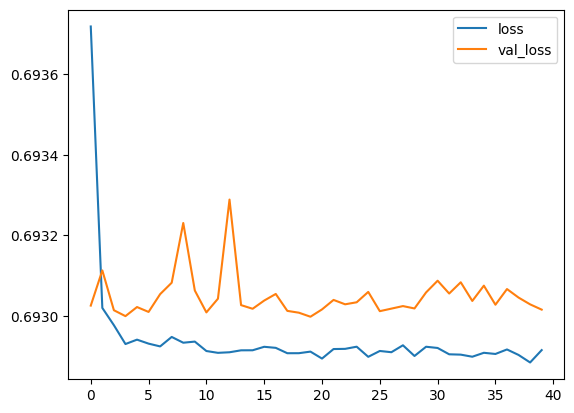

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

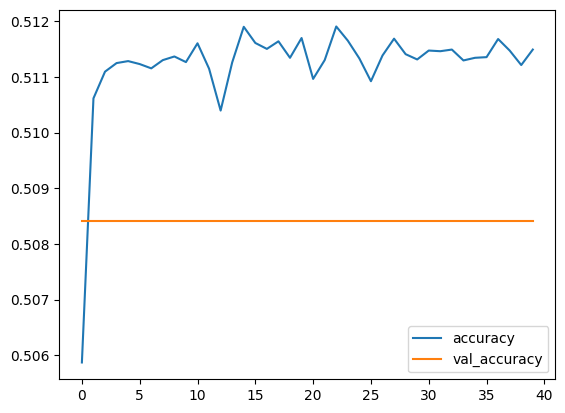

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [18]:
pred=model.predict(X_test)


1357/1357 [==============================] - 6s 4ms/step


In [19]:
lstm2=model.evaluate(X_test, Y_test)

1357/1357 [==============================] - 6s 4ms/step - loss: 0.6928 - accuracy: 0.5130


(array([2.200e+01, 8.500e+01, 1.270e+02, 5.700e+01, 1.000e+01, 2.400e+01,
        7.900e+01, 1.450e+02, 9.100e+01, 8.200e+01, 1.630e+02, 1.540e+02,
        1.710e+02, 1.350e+02, 1.660e+02, 2.260e+02, 3.020e+02, 4.130e+02,
        4.950e+02, 5.170e+02, 5.130e+02, 8.630e+02, 1.358e+03, 1.422e+03,
        9.250e+02, 1.150e+03, 1.032e+03, 1.151e+03, 1.434e+03, 1.381e+03,
        1.605e+03, 1.910e+03, 1.911e+03, 1.769e+03, 2.000e+03, 2.073e+03,
        1.542e+03, 1.546e+03, 1.588e+03, 1.721e+03, 2.585e+03, 3.483e+03,
        4.316e+03, 5.890e+02, 5.200e+01, 4.000e+00, 1.000e+00, 4.000e+00,
        1.000e+00, 2.000e+00]),
 array([0.48872849, 0.48876023, 0.488792  , 0.48882374, 0.48885548,
        0.48888725, 0.48891899, 0.48895073, 0.4889825 , 0.48901424,
        0.48904598, 0.48907775, 0.48910949, 0.48914123, 0.489173  ,
        0.48920473, 0.48923647, 0.48926824, 0.48929998, 0.48933172,
        0.48936349, 0.48939523, 0.48942697, 0.48945874, 0.48949048,
        0.48952222, 0.48955399, 0.48

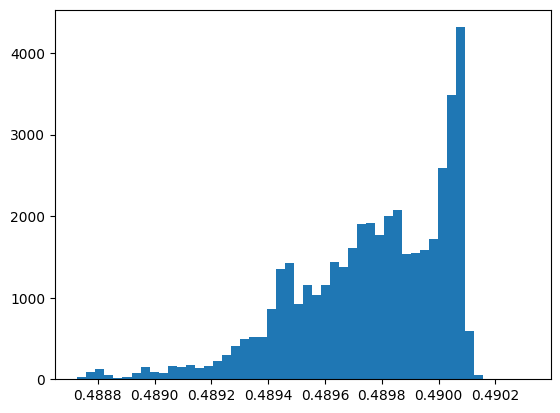

In [20]:
plt.hist(pred , bins=50)

In [21]:
model.save("model1.h5")

In [22]:
pd.DataFrame(pred,Y_test)

0
0.0  0.489609
1.0  0.489613
0.0  0.489616
0.0  0.489621
1.0  0.489627
..        ...
1.0  0.489726
0.0  0.489727
1.0  0.489731
1.0  0.489729
0.0  0.489730

[43395 rows x 1 columns]